# Student Stress Monitoring Datasets

Link do Dataset: https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets

## Aqui vamos tratar somente o: StressLevelDataset.csv

(1100 linhas, 21 colunas)

- É uma versão mais numérica e estruturada.
- Variáveis agrupadas em fatores (psicológicos, fisiológicos, sociais, etc.).
- Escalas Likert convertidas em valores numéricos diretos.
- Variável-alvo: stress_level (0=Sem estresse, 1=Estresse, 2=Angústia).

### Colunas
- anxiety_level: 0 - 21
- self_esteem: 0 - 30
- mental_health_history: 0 - 1
- depression: 0 - 27
- headache: 0 - 5
- blood_pressure: 1 - 3
- sleep_quality: 0 - 5
- breathing_problem: 0 - 5
- noise_level: 0 - 5
- living_conditions: 0 - 5
- safety: 0 - 5
- basic_needs: 0 - 5
- academic_performance: 0 - 5
- study_load: 0 - 5
- teacher_student_relationship: 0 - 5
- future_career_concerns: 0 - 5
- social_support: 0 - 3
- peer_pressure: 0 - 5
- extracurricular_activities: 0 - 5
- bullying: 0 - 5

- #### TARGET: stress_level: 0 - 2


- Escala não padronizada:
  - Vamos normalizar
  - Se for só usar árvores (Decision Tree, Random Forest, Gradient Boosting): não precisa normalizar.
  - Se for usar redes neurais, k-NN, SVM, Regressão Logística, PCA: sim,precisa normalizar


## Carregamento

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/AnaClaraGuerra22/INF-493-CD/d742b93178fbbc71c5a84c61291a9c8ae20244c6/TRAB%20FINAL/DATASET/StressLevelDataset.csv"
df = pd.read_csv(url)

In [ ]:
print(df.shape)
print(df.head())

(1100, 21)
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...          

## Pre Processamento

In [ ]:
# ver se tem valores ausentes
print("Se há NaN:")
print(df.isnull().sum())

Se há NaN:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [ ]:
# ver se tem linhas duplicadas
print(f"Linhas duplicadas: {df.duplicated().sum()}")

Linhas duplicadas: 0


In [ ]:
# ver a distribuiçao da variavel alvo (stress_level)
print("Distribuição da variável alvo:")
print(df['stress_level'].value_counts())
print("\nEm porcentagem (%):")
print(df['stress_level'].value_counts(normalize=True) * 100)

# O dataset esta muito bem balanceado, não vou precisar aplicar SMOTE ou outros
# Alem de poder usar a metrica de Acuracia

Distribuição da variável alvo:
stress_level
0    373
2    369
1    358
Name: count, dtype: int64

Em porcentagem (%):
stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


In [ ]:
# adicionando um id_pessoa
df.insert(0, "id_pessoa", range(1, len(df) + 1))
df.head()


,id_pessoa,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,1,14,20,0,11,2,1,2,4,2,...,2,3,2,3,3,2,3,3,2,1
1,2,15,8,1,15,5,3,1,4,3,...,2,1,4,1,5,1,4,5,5,2
2,3,12,18,1,14,2,1,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,4,16,12,1,15,4,3,1,3,4,...,2,2,4,1,4,1,4,4,5,2
4,5,16,28,0,7,2,3,5,1,3,...,3,4,3,1,2,1,5,0,5,1


anxiety_level: 0 - 21

self_esteem: 0 - 30

mental_health_history: 0 - 1

depression: 0 - 27

headache: 0 - 5

blood_pressure: 1 - 3

sleep_quality: 0 - 5

breathing_problem: 0 - 5

noise_level: 0 - 5

living_conditions: 0 - 5

safety: 0 - 5

basic_needs: 0 - 5

academic_performance: 0 - 5

study_load: 0 - 5

teacher_student_relationship: 0 - 5

future_career_concerns: 0 - 5

social_support: 0 - 3

peer_pressure: 0 - 5

extracurricular_activities: 0 - 5

bullying: 0 - 5

TARGET: stress_level: 0 - 2

id_pessoa 1 1100
anxiety_level 0 21
self_esteem 0 30
mental_health_history 0 1
depression 0 27
headache 0 5
blood_pressure 1 3
sleep_quality 0 5
breathing_problem 0 5
noise_level 0 5
living_conditions 0 5
safety 0 5
basic_needs 0 5
academic_performance 0 5
study_load 0 5
teacher_student_relationship 0 5
future_career_concerns 0 5
social_support 0 3
peer_pressure 0 5
extracurricular_activities 0 5
bullying 0 5
stress_level 0 2


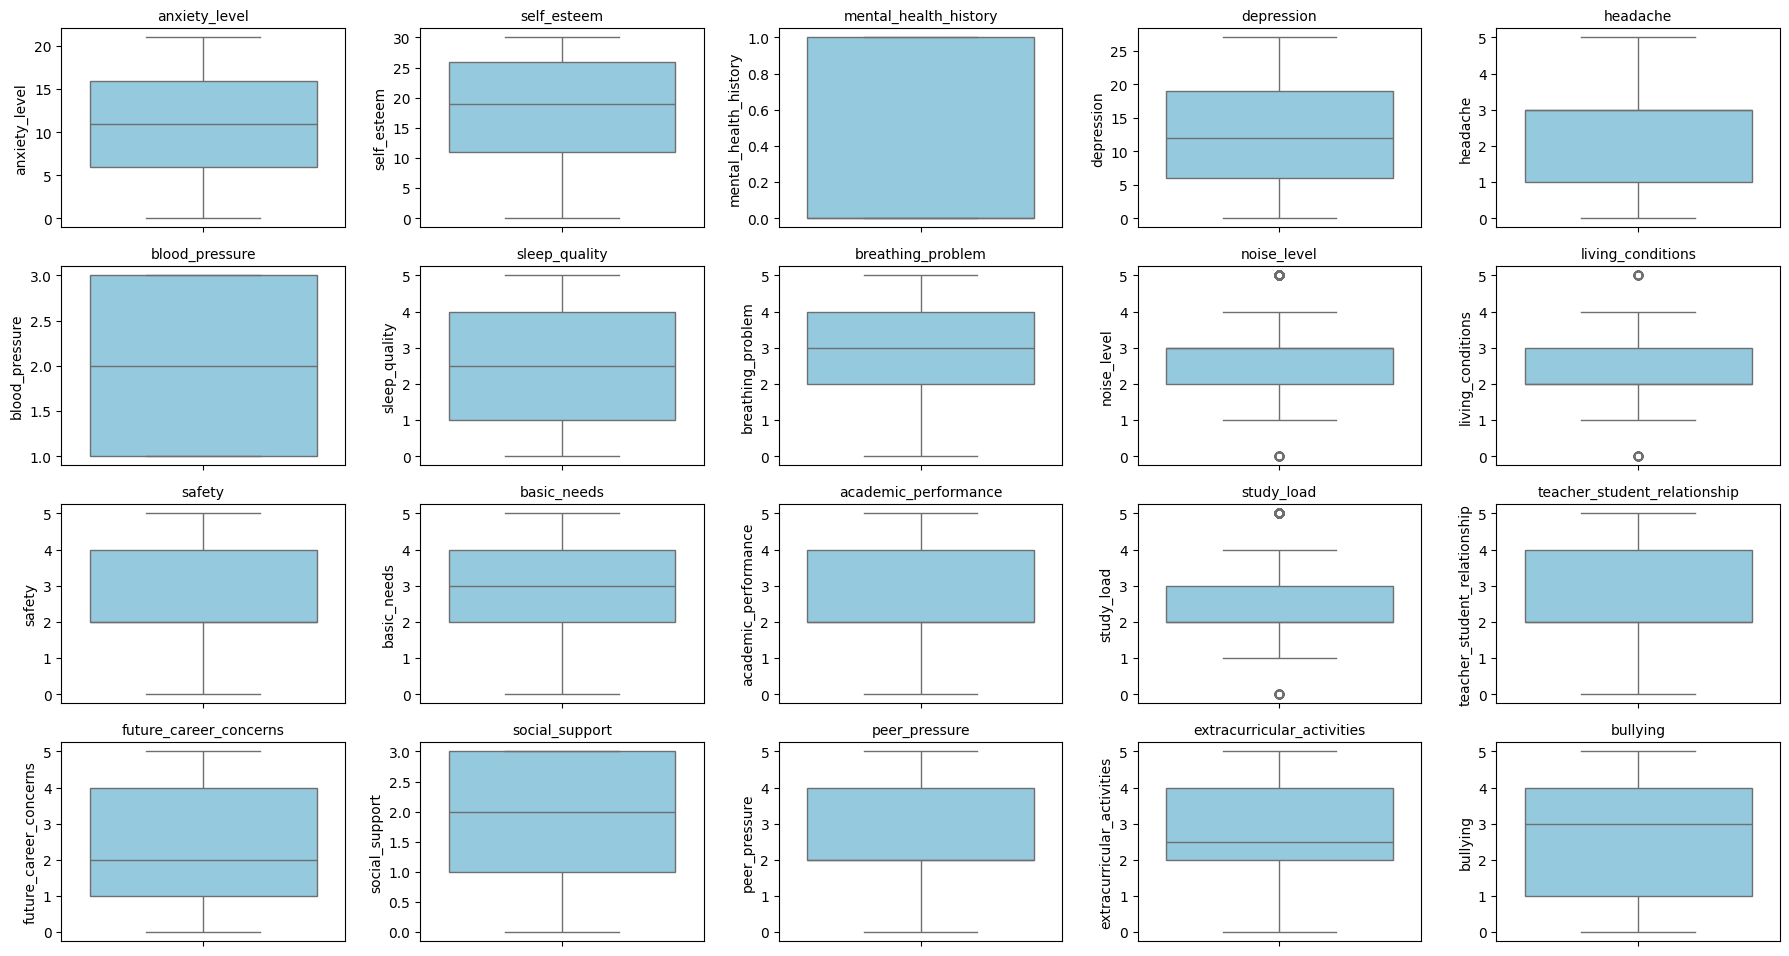

In [ ]:
# ver se tem outliers
# olhando os intervalos das variaveis

for col in df.columns:
    print(col, df[col].min(), df[col].max())


features = df.drop(columns=["stress_level", "id_pessoa"])

plt.figure(figsize=(18, 12))
for i, col in enumerate(features.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=features[col], color="skyblue")
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()



# tudo OK

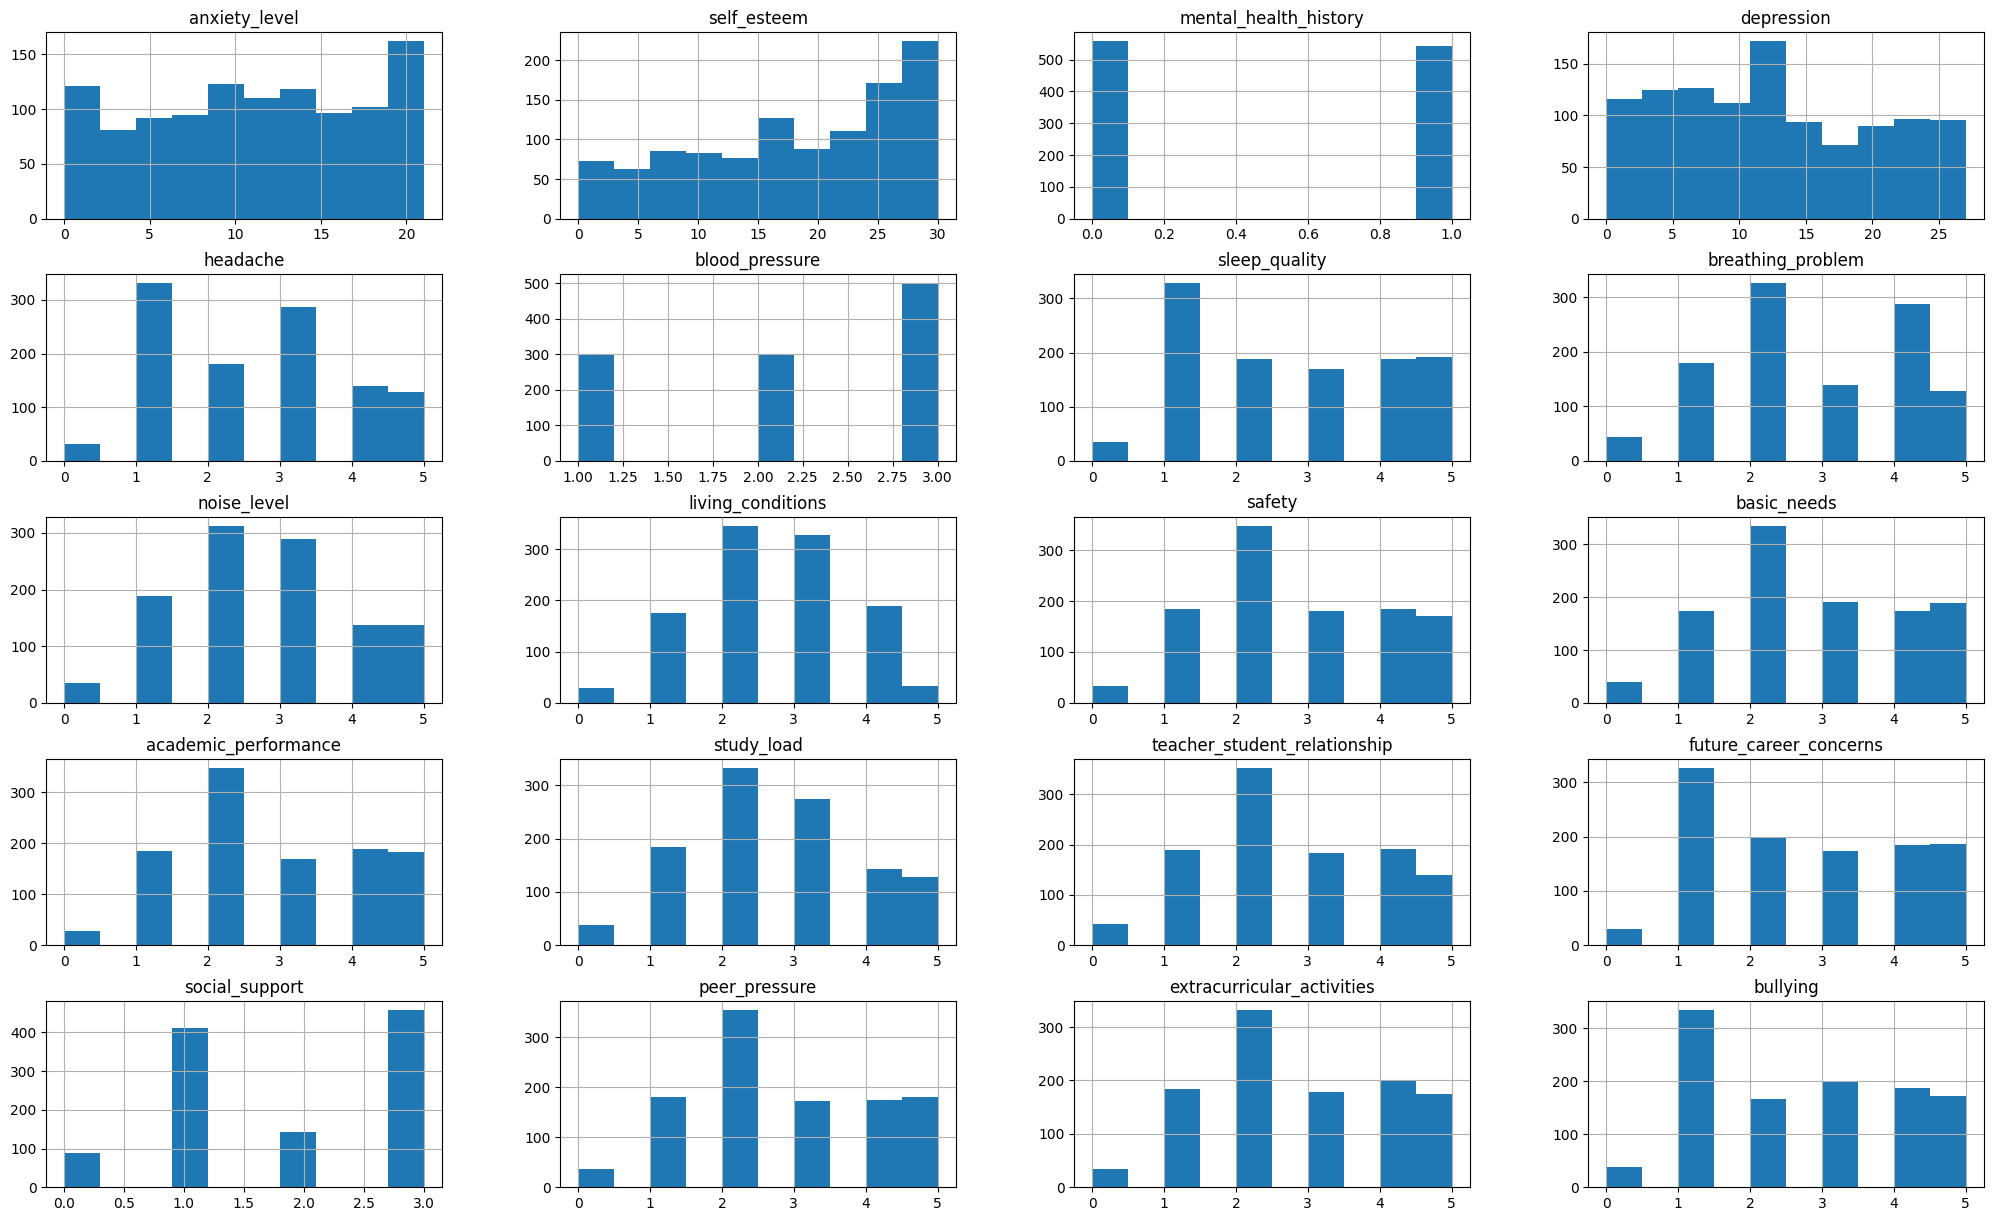

In [ ]:
# ver a distribuicao dos atributos
df.drop(columns=["id_pessoa", "stress_level"]).hist(figsize=(25,15))
plt.show()


### Distribuições uniformes vs. enviesadas

- anxiety_level e depression: quase uniformes, com alunos espalhados em todas as faixas: indicam diversidade na amostra

- self_esteem: um pouco concentrado perto de valores altos (25–30): maioria com autoestima elevada

- blood_pressure: só 3 valores possíveis (1, 2, 3), todos bem representados

- social_support: polarizado (muitos com suporte baixo = 1, muitos com suporte alto = 3): padrão bimodal

- headache, sleep_quality, breathing_problem: concentrações em alguns níveis específicos, mostrando que certos problemas são mais comuns

### Enviesamento

- Variáveis como academic_performance, study_load, teacher_student_relationship não são uniformes: valores medianos (2–3)

- Isso sugere que muitos estudantes percebem sua situação como “regular” ou “moderada”

In [ ]:
# normalizar Min Max [0, 1]

X = df.drop(columns=["stress_level", "id_pessoa"])
y = df["stress_level"]

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_scaled = pd.concat([df[["id_pessoa"]], X_scaled, y], axis=1)

df_scaled.head()

,id_pessoa,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,1,0.666667,0.666667,0.0,0.407407,0.4,0.0,0.4,0.8,0.4,...,0.4,0.6,0.4,0.6,0.6,0.666667,0.6,0.6,0.4,1
1,2,0.714286,0.266667,1.0,0.555556,1.0,1.0,0.2,0.8,0.6,...,0.4,0.2,0.8,0.2,1.0,0.333333,0.8,1.0,1.0,2
2,3,0.571429,0.600000,1.0,0.518519,0.4,0.0,0.4,0.4,0.4,...,0.4,0.4,0.6,0.6,0.4,0.666667,0.6,0.4,0.4,1
3,4,0.761905,0.400000,1.0,0.555556,0.8,1.0,0.2,0.6,0.8,...,0.4,0.4,0.8,0.2,0.8,0.333333,0.8,0.8,1.0,2
4,5,0.761905,0.933333,0.0,0.259259,0.4,1.0,1.0,0.2,0.6,...,0.6,0.8,0.6,0.2,0.4,0.333333,1.0,0.0,1.0,1


## Salvar para começar o 1_Preparacao

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

DRIVE_PATH = '/content/drive/MyDrive/MATERIAS/INF493_CD/TRAB_FINAL/dataset/Student_Stress_Monitoring_Datasets/'

os.makedirs(DRIVE_PATH, exist_ok=True)

# DataFrame Original (com 'id_pessoa', mas sem normalização)
df.to_csv(f'{DRIVE_PATH}StressLevelDataset_Original.csv', index=False)
print(f"Salvo: {DRIVE_PATH}StressLevelDataset_Original.csv")

# Salva o DataFrame Normalizado [0, 1]
df_scaled.to_csv(f'{DRIVE_PATH}StressLevelDataset_Scaled.csv', index=False)
print(f"Salvo: {DRIVE_PATH}StressLevelDataset_Scaled.csv")

Salvo: /content/drive/MyDrive/MATERIAS/INF493_CD/TRAB_FINAL/dataset/Student_Stress_Monitoring_Datasets/StressLevelDataset_Original.csv
Salvo: /content/drive/MyDrive/MATERIAS/INF493_CD/TRAB_FINAL/dataset/Student_Stress_Monitoring_Datasets/StressLevelDataset_Scaled.csv
